### K-Medoids Clustering

In [1]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [5]:
!pip install pyclustering



     ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
     ---------------------------------------- 2.6/2.6 MB 21.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395132 sha256=3b6f1ef1fd86dca9661aada6d4e1375175ad9e0e3dee04ff5d268b706814ec70
  Stored in directory: c:\users\srira\appdata\local\pip\cache\wheels\68\29\b4\131bd7deec3663cc311ab9aa64d6517c3e3ec24bcadfc32f74
Successfully built pyclustering


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

# PyClustering K-Medoids
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import calculate_distance_matrix

# Load data
df = pd.read_csv(r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\data_cell_for_clustering.csv")

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Compute distance matrix
distance_matrix = calculate_distance_matrix(X_scaled)

# Choose initial medoid indices (random selection)
np.random.seed(42)
initial_medoids = np.random.choice(len(X_scaled), size=5, replace=False)

# Run K-Medoids clustering
kmedoids_instance = kmedoids(distance_matrix, initial_medoids, data_type='distance_matrix')
kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()

# Assign cluster labels
labels = np.zeros(len(X_scaled))
for cluster_id, cluster_points in enumerate(clusters):
    for point in cluster_points:
        labels[point] = cluster_id

df["Cluster"] = labels

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
df["PCA1"], df["PCA2"] = pca_result[:, 0], pca_result[:, 1]

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(X_scaled)
df["tSNE1"], df["tSNE2"] = tsne_result[:, 0], tsne_result[:, 1]

# UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_model.fit_transform(X_scaled)
df["UMAP1"], df["UMAP2"] = umap_result[:, 0], umap_result[:, 1]

# Save results
df.to_csv( r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\kmedoids_clusters.csv", index=False)
print("Clustering complete. Results saved.")


Clustering complete. Results saved.


Silhouette Score: 0.2234
Clustering complete. Results saved.


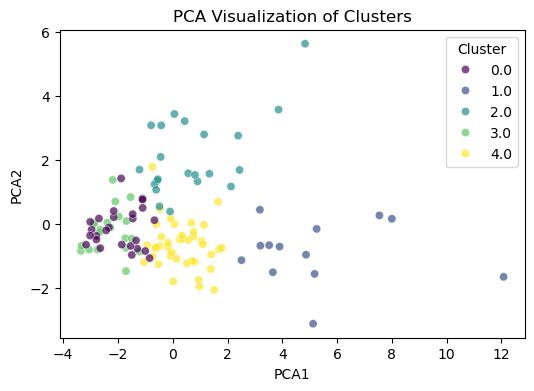

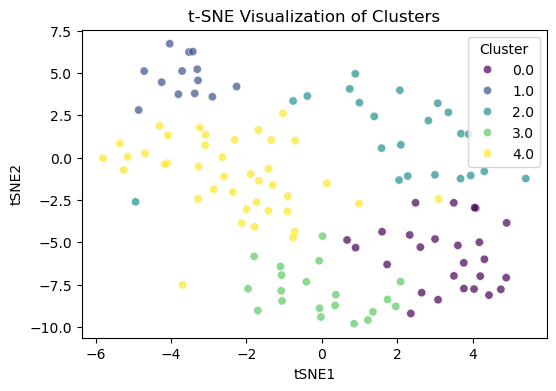

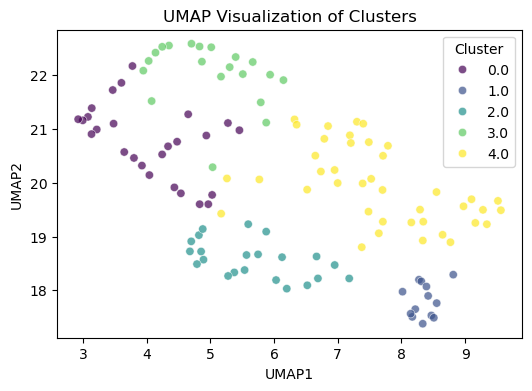

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import calculate_distance_matrix
from sklearn.metrics import silhouette_score

# Load data
df = pd.read_csv(r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\data_cell_for_clustering.csv")

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Compute distance matrix
distance_matrix = calculate_distance_matrix(X_scaled)

# Choose initial medoid indices
np.random.seed(42)
initial_medoids = np.random.choice(len(X_scaled), size=5, replace=False)

# Run K-Medoids clustering
kmedoids_instance = kmedoids(distance_matrix, initial_medoids, data_type='distance_matrix')
kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()

# Assign cluster labels
labels = np.zeros(len(X_scaled))
for cluster_id, cluster_points in enumerate(clusters):
    for point in cluster_points:
        labels[point] = cluster_id

df["Cluster"] = labels

# Compute Silhouette Score
silhouette_avg = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {silhouette_avg:.4f}")

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
df["PCA1"], df["PCA2"] = pca_result[:, 0], pca_result[:, 1]

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(X_scaled)
df["tSNE1"], df["tSNE2"] = tsne_result[:, 0], tsne_result[:, 1]

# UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_model.fit_transform(X_scaled)
df["UMAP1"], df["UMAP2"] = umap_result[:, 0], umap_result[:, 1]

# Save results
df.to_csv(r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\kmedoids_clusters.csv", index=False)
print("Clustering complete. Results saved.")

# Plot PCA
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df["PCA1"], y=df["PCA2"], hue=df["Cluster"], palette="viridis", alpha=0.7)
plt.title("PCA Visualization of Clusters")
plt.legend(title="Cluster")
plt.show()

# Plot t-SNE
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df["tSNE1"], y=df["tSNE2"], hue=df["Cluster"], palette="viridis", alpha=0.7)
plt.title("t-SNE Visualization of Clusters")
plt.legend(title="Cluster")
plt.show()

# Plot UMAP
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df["UMAP1"], y=df["UMAP2"], hue=df["Cluster"], palette="viridis", alpha=0.7)
plt.title("UMAP Visualization of Clusters")
plt.legend(title="Cluster")
plt.show()


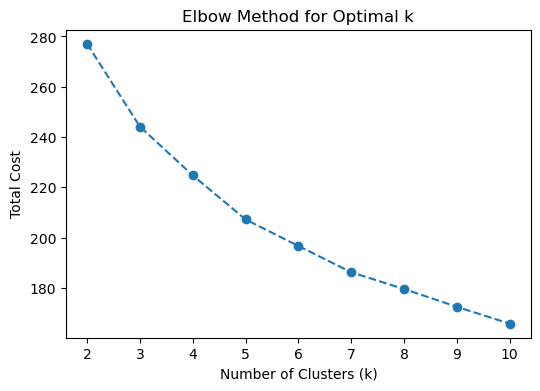

Best Number of Clusters: 4
Best Silhouette Score: 0.2666
Clustering complete. Results saved.


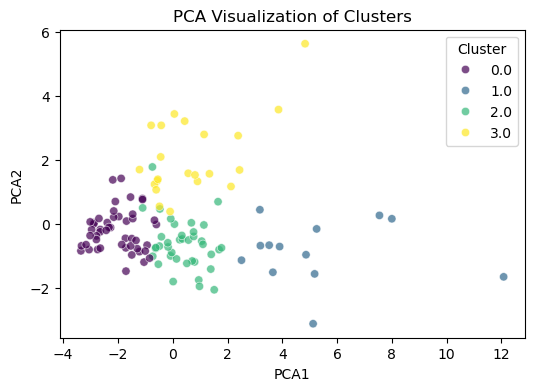

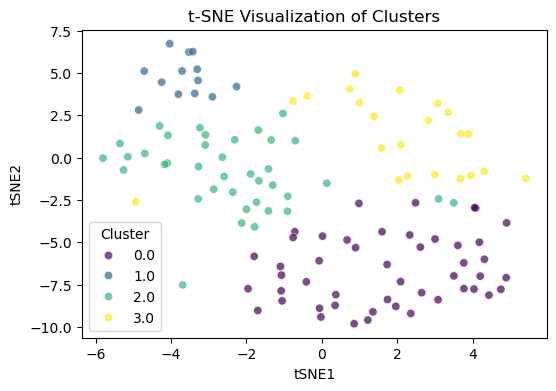

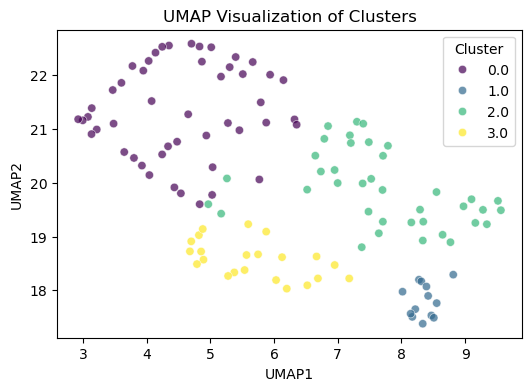

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import calculate_distance_matrix
from sklearn.metrics import silhouette_score
import random

# Load data
df = pd.read_csv("data_cell_for_clustering.csv")

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Compute distance matrix (convert to NumPy array for indexing)
distance_matrix = np.array(calculate_distance_matrix(X_scaled))

# Elbow Method to find optimal k
def elbow_method(X, max_k=10):
    costs = []
    for k in range(2, max_k+1):
        initial_medoids = np.random.choice(len(X), size=k, replace=False)
        kmedoids_instance = kmedoids(distance_matrix, initial_medoids, data_type='distance_matrix')
        kmedoids_instance.process()
        
        # Get clusters and medoids
        clusters = kmedoids_instance.get_clusters()
        medoids = np.array(kmedoids_instance.get_medoids())  # Convert medoids list to NumPy array

        # Compute total cost: sum of distances from points to their closest medoid
        total_cost = sum(
            np.min(distance_matrix[point, medoids]) for cluster in clusters for point in cluster
        )
        costs.append(total_cost)

    # Plot Elbow Graph
    plt.figure(figsize=(6, 4))
    plt.plot(range(2, max_k+1), costs, marker='o', linestyle='--')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Total Cost')
    plt.title('Elbow Method for Optimal k')
    plt.show()

# Run Elbow Method
elbow_method(X_scaled, max_k=10)

# Random Search for Best Hyperparameters
best_silhouette = -1
best_k = None
best_labels = None

for _ in range(10):  # Run 10 different trials
    k = random.randint(2, 10)  # Randomly choose k
    initial_medoids = np.random.choice(len(X_scaled), size=k, replace=False)
    
    kmedoids_instance = kmedoids(distance_matrix, initial_medoids, data_type='distance_matrix')
    kmedoids_instance.process()
    
    clusters = kmedoids_instance.get_clusters()
    labels = np.zeros(len(X_scaled))
    
    for cluster_id, cluster_points in enumerate(clusters):
        for point in cluster_points:
            labels[point] = cluster_id

    silhouette_avg = silhouette_score(X_scaled, labels)

    if silhouette_avg > best_silhouette:
        best_silhouette = silhouette_avg
        best_k = k
        best_labels = labels

# Print Best Results
print(f"Best Number of Clusters: {best_k}")
print(f"Best Silhouette Score: {best_silhouette:.4f}")

# Assign best clustering labels
df["Cluster"] = best_labels

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
df["PCA1"], df["PCA2"] = pca_result[:, 0], pca_result[:, 1]

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(X_scaled)
df["tSNE1"], df["tSNE2"] = tsne_result[:, 0], tsne_result[:, 1]

# UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_model.fit_transform(X_scaled)
df["UMAP1"], df["UMAP2"] = umap_result[:, 0], umap_result[:, 1]

# Save results
df.to_csv("data_cell_for_clustering_kmedoids_optimized.csv", index=False)
print("Clustering complete. Results saved.")

# Plot PCA
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df["PCA1"], y=df["PCA2"], hue=df["Cluster"], palette="viridis", alpha=0.7)
plt.title("PCA Visualization of Clusters")
plt.legend(title="Cluster")
plt.show()

# Plot t-SNE
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df["tSNE1"], y=df["tSNE2"], hue=df["Cluster"], palette="viridis", alpha=0.7)
plt.title("t-SNE Visualization of Clusters")
plt.legend(title="Cluster")
plt.show()

# Plot UMAP
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df["UMAP1"], y=df["UMAP2"], hue=df["Cluster"], palette="viridis", alpha=0.7)
plt.title("UMAP Visualization of Clusters")
plt.legend(title="Cluster")
plt.show()

   



In [1]:
import numpy as np
import pandas as pd
from pyclustering.cluster.kmedoids import kmedoids
from sklearn.metrics import silhouette_score

# Function to run alternative K‑Medoids clustering using pyclustering
def run_alternative_kmedoids(X, n_clusters, random_state=42):
    data_list = X.tolist()
    n_samples = len(data_list)
    
    # Choose initial medoids randomly
    import random
    random.seed(random_state)
    initial_medoids = random.sample(range(n_samples), n_clusters)
    
    # Run K‑Medoids clustering
    kmedoids_instance = kmedoids(data_list, initial_medoids)
    kmedoids_instance.process()
    clusters = kmedoids_instance.get_clusters()
    
    # Create an array of labels based on cluster assignments
    labels = np.full(n_samples, -1, dtype=int)
    for cluster_idx, cluster in enumerate(clusters):
        for index in cluster:
            labels[index] = cluster_idx
    
    return labels

# Function to calculate silhouette score and p‑value via permutation testing
def calculate_p_value(X, labels, n_clusters, n_permutations=1000, random_state=42):
    observed_score = silhouette_score(X, labels)
    permuted_scores = []
    np.random.seed(random_state)
    for i in range(n_permutations):
        random_labels = np.random.randint(0, n_clusters, len(X))
        try:
            score = silhouette_score(X, random_labels)
        except Exception:
            score = 0
        permuted_scores.append(score)
    permuted_scores = np.array(permuted_scores)
    p_value = np.mean(permuted_scores >= observed_score)
    return observed_score, p_value

# Load data
csv_path = r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\data_cell_for_clustering.csv"
df = pd.read_csv(csv_path)
if "Cell Number" in df.columns:
    df = df.drop(columns=["Cell Number"])
X = df.values

# Set number of clusters
n_clusters = 5

# Run K‑Medoids clustering
labels_kmed = run_alternative_kmedoids(X, n_clusters, random_state=42)

# Compute silhouette score and p‑value for K‑Medoids clustering
obs, p = calculate_p_value(X, labels_kmed, n_clusters)
print("K‑Medoids: Silhouette Score =", obs, "p‑value =", p)


K‑Medoids: Silhouette Score = 0.6110866698842814 p‑value = 0.0


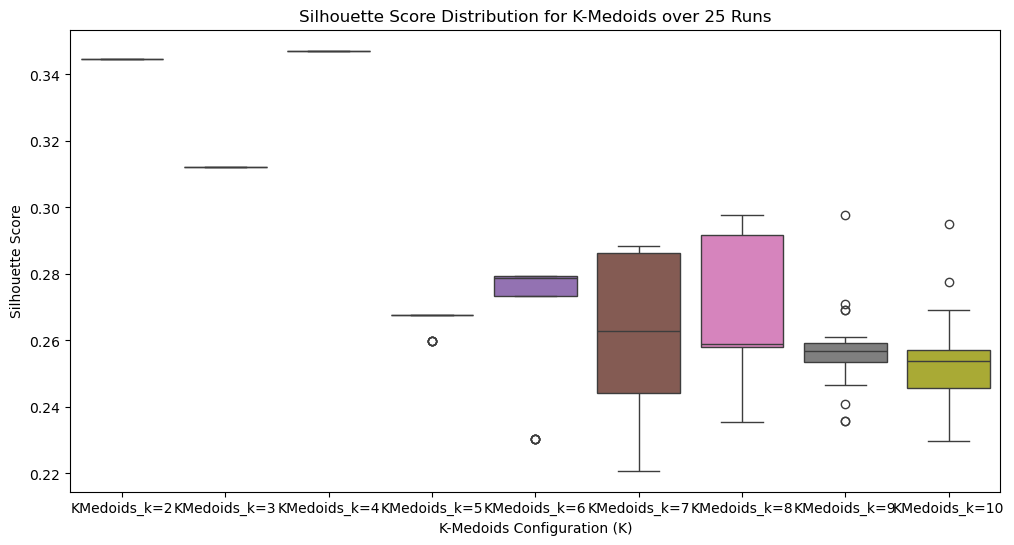

Friedman test statistic: 150.59199999999998, p-value: 1.47551105522482e-28
Nemenyi post-hoc test results:
              0             1             2             3             4  \
0  1.000000e+00  9.342789e-01  9.342789e-01  1.478329e-05  5.491124e-05   
1  9.342789e-01  1.000000e+00  1.940407e-01  5.140712e-03  1.323301e-02   
2  9.342789e-01  1.940407e-01  1.000000e+00  7.656884e-09  3.968223e-08   
3  1.478329e-05  5.140712e-03  7.656884e-09  1.000000e+00  9.999994e-01   
4  5.491124e-05  1.323301e-02  3.968223e-08  9.999994e-01  1.000000e+00   
5  1.573168e-06  9.628594e-04  4.803075e-10  9.999772e-01  9.991153e-01   
6  6.497459e-07  4.890576e-04  1.628471e-10  9.997426e-01  9.961175e-01   
7  9.749576e-10  2.799072e-06  6.572520e-14  8.047626e-01  6.422038e-01   
8  1.744038e-11  1.031861e-07  6.661338e-16  4.262151e-01  2.690029e-01   

              5             6             7             8  
0  1.573168e-06  6.497459e-07  9.749576e-10  1.744038e-11  
1  9.628594e-04  4.8905

In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score
from scipy.stats import friedmanchisquare
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import distance_metric, type_metric
import warnings

warnings.filterwarnings("ignore")

# Load and preprocess dataset
data = pd.read_csv(r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\data_cell_for_clustering.csv")
data = data.drop('Cell Number', axis=1)
X = data.select_dtypes(include=[np.number]).values

# Scale features using MinMaxScaler (better for distance-based clustering)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Define different cluster values (K = 2 to 10)
k_values = list(range(2, 11))  # Start from 2 to avoid single-cluster issue
n_runs = 25  # Number of runs

# Dictionary to store Silhouette Scores
silhouette_scores = {f'KMedoids_k={k}': [] for k in k_values}

for run in range(n_runs):
    for k in k_values:
        # Initialize medoids randomly
        initial_medoids = np.random.choice(len(X_scaled), k, replace=False).tolist()
        
        # Run K-Medoids clustering
        kmedoid_instance = kmedoids(X_scaled, initial_medoids, metric=distance_metric(type_metric.EUCLIDEAN))
        kmedoid_instance.process()
        labels = np.zeros(len(X_scaled))
        
        # Assign labels based on medoid clustering
        for cluster_idx, cluster in enumerate(kmedoid_instance.get_clusters()):
            for index in cluster:
                labels[index] = cluster_idx

        if len(set(labels)) > 1:  # Only calculate Silhouette if more than 1 cluster exists
            score = silhouette_score(X_scaled, labels)
            silhouette_scores[f'KMedoids_k={k}'].append(score)
        else:
            silhouette_scores[f'KMedoids_k={k}'].append(np.nan)  # Avoid single-cluster error

# Convert to DataFrame and drop NaN values
silhouette_df = pd.DataFrame(silhouette_scores)
silhouette_df.dropna(inplace=True)

# Ensure there is enough valid data for statistical tests
if silhouette_df.shape[0] > 0:
    # Plot the distribution of Silhouette Scores
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=silhouette_df)
    plt.title(f'Silhouette Score Distribution for K-Medoids over {n_runs} Runs')
    plt.xlabel('K-Medoids Configuration (K)')
    plt.ylabel('Silhouette Score')
    plt.show()

    # Perform the Friedman test if enough valid scores exist
    if silhouette_df.shape[0] > 2:
        stat, p_value = friedmanchisquare(*[silhouette_df[config] for config in silhouette_df.columns])
        print(f'Friedman test statistic: {stat}, p-value: {p_value}')

        # If p-value is significant, perform Nemenyi post-hoc test
        if p_value < 0.05:
            from scikit_posthocs import posthoc_nemenyi_friedman
            nemenyi_results = posthoc_nemenyi_friedman(silhouette_df.values)
            print('Nemenyi post-hoc test results:')
            print(nemenyi_results)
        else:
            print('No significant differences found among the K-Medoids configurations.')
    else:
        print("Not enough valid data for Friedman test.")
else:
    print("Not enough valid data for analysis.")


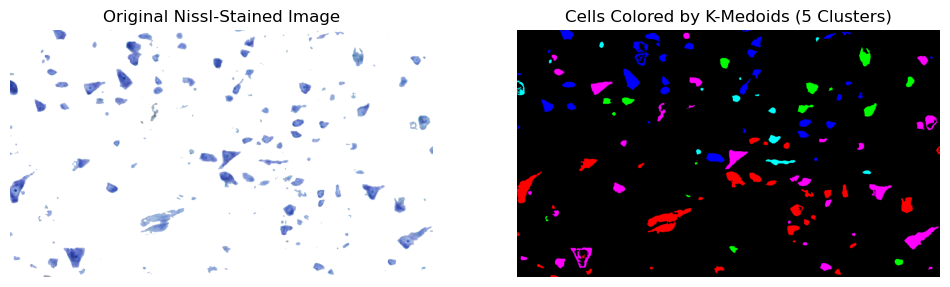

In [24]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from sklearn.metrics import pairwise_distances, silhouette_score
import numpy as np

# Load cell feature data for clustering
csv_path = r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\data_cell_for_clustering.csv"
df = pd.read_csv(csv_path)

# Drop non-numeric columns & scale features
df = df.select_dtypes(include=[np.number])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# K-Medoids Clustering Function (Manual Implementation)
def k_medoids(X, k, max_iter=100):
    n_samples = X.shape[0]
    medoids = np.random.choice(n_samples, k, replace=False)
    
    for _ in range(max_iter):
        distances = cdist(X, X[medoids], metric='euclidean')
        labels = np.argmin(distances, axis=1)

        # Compute new medoids
        new_medoids = np.array([
            X[np.where(labels == i)[0]].mean(axis=0) 
            for i in range(k)
        ])
        
        # Convert medoids to closest points in the dataset
        new_medoids_idx = np.argmin(cdist(new_medoids, X, metric='euclidean'), axis=1)
        
        if np.array_equal(medoids, new_medoids_idx):  # If medoids don't change, stop
            break
        medoids = new_medoids_idx

    return labels

# Run K-Medoids Clustering
num_clusters = 5  # Adjust based on data
kmedoid_labels = k_medoids(X_scaled, num_clusters)

# Add cluster labels to the dataframe
df["Cluster"] = kmedoid_labels

# Save new CSV with K-Medoids labels
df.to_csv(r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\data_cell_clustered_kmediod.csv", index=False)

# Load the Nissl-stained image
image = cv2.imread("restored_white_background_debug-Copy1.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding
binary_image = cv2.adaptiveThreshold(
    gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2
)

# Find contours
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter out small contours (noise)
filtered_contours = [c for c in contours if cv2.contourArea(c) > 42]

num_detected_cells = len(filtered_contours)
num_csv_cells = len(df)

# Ensure alignment of data and contours
if num_detected_cells != num_csv_cells:
    print(f"⚠️ Warning: {num_detected_cells} contours detected, but CSV has {num_csv_cells} rows.")
min_cells = min(num_detected_cells, num_csv_cells)

# Read K-Medoids cluster labels from CSV
clusters = df['Cluster'].values[:min_cells]

# Define fixed colors for clusters
fixed_colors = {
    0: (255, 0, 0),   # Red
    1: (0, 255, 0),   # Green
    2: (0, 0, 255),   # Blue
    3: (255, 255, 0), # Yellow
    4: (255, 0, 255)  # Magenta
}

# Auto-generate colors for extra clusters
def get_cluster_color(cluster_id):
    if cluster_id in fixed_colors:
        return fixed_colors[cluster_id]
    return tuple(random.randint(0, 255) for _ in range(3))  # Random color for unknown clusters

# Create an empty color image
clustered_image = np.zeros_like(image)

# Draw each detected cell with its corresponding cluster color
for i in range(min_cells):
    cluster_id = clusters[i]  
    color = get_cluster_color(cluster_id)  
    cv2.drawContours(clustered_image, [filtered_contours[i]], -1, color, thickness=cv2.FILLED)

# Display the results
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0].set_title("Original Nissl-Stained Image")
ax[0].axis("off")

ax[1].imshow(cv2.cvtColor(clustered_image, cv2.COLOR_BGR2RGB))
ax[1].set_title(f"Cells Colored by K-Medoids ({num_clusters} Clusters)")
ax[1].axis("off")

plt.show()


✅ Saved clustered image with 5 clusters to C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\clustered_nissl_image_kmedoid_5clusters.png


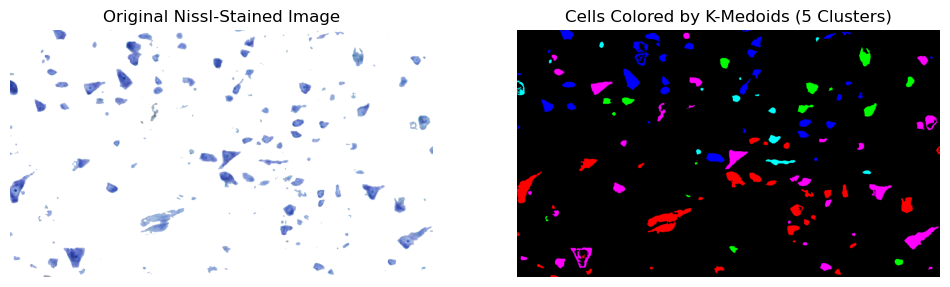

In [28]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load K-Medoids cluster data
csv_path = r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\data_cell_clustered_kmediod.csv"
df = pd.read_csv(csv_path)

# Ensure 'Cluster' column exists
if 'Cluster' not in df.columns:
    raise KeyError("CSV must have a 'Cluster' column!")

# Load and preprocess the Nissl-stained image
image = cv2.imread("restored_white_background_debug-Copy1.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding
binary_image = cv2.adaptiveThreshold(
    gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2
)

# Find contours
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter out small contours (noise)
filtered_contours = [c for c in contours if cv2.contourArea(c) > 42]  

num_detected_cells = len(filtered_contours)

# Validate cell count
if num_detected_cells != len(df):
    raise ValueError(f"Mismatch: Detected {num_detected_cells} cells, but CSV has {len(df)} rows.")

# Read cluster labels from CSV
clusters = df['Cluster'].values  

# Define unique colors for **5 clusters**
cluster_colors = {
    0: (255, 0, 0),   # Red
    1: (0, 255, 0),   # Green
    2: (0, 0, 255),   # Blue
    3: (255, 255, 0), # Yellow
    4: (255, 0, 255)  # Magenta
}

# Create an empty color image
clustered_image = np.zeros_like(image)

# Draw each detected cell with its corresponding cluster color
for i, contour in enumerate(filtered_contours):
    cluster_id = clusters[i]  
    color = cluster_colors.get(cluster_id, (255, 255, 255))  # Default to white if cluster not found
    cv2.drawContours(clustered_image, [contour], -1, color, thickness=cv2.FILLED)

# Save the final clustered image
output_path = r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\clustered_nissl_image_kmedoid_5clusters.png"
cv2.imwrite(output_path, clustered_image)
print(f"✅ Saved clustered image with 5 clusters to {output_path}")

# Show original and clustered images
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0].set_title("Original Nissl-Stained Image")
ax[0].axis("off")

ax[1].imshow(cv2.cvtColor(clustered_image, cv2.COLOR_BGR2RGB))
ax[1].set_title("Cells Colored by K-Medoids (5 Clusters)")
ax[1].axis("off")

plt.show()


In [ ]:
import cv2
import numpy as np
import os
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils.metric import distance_metric, type_metric
from sklearn.cluster import KMeans

# Define number of clusters
num_clusters = 5

def extract_cluster_masks(image, labels, num_clusters, output_folder):
    """
    Extracts and saves masks for each cluster.
    """
    os.makedirs(output_folder, exist_ok=True)
    
    for cluster_id in range(num_clusters):
        mask = (np.array(labels) == cluster_id).reshape(image.shape[:2]).astype(np.uint8) * 255
        output_path = os.path.join(output_folder, f"cluster_{cluster_id}.png")
        cv2.imwrite(output_path, mask)
        print(f"✅ Saved segmented cluster {cluster_id} to {output_path}")

# Load image
image_path = r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\clustered_nissl_image_gmm_5clusters.png"
image = cv2.imread(image_path)

if image is None:
    print("❌ Error: Image not loaded! Check the file path.")
    exit()

# Fix grayscale issue
if len(image.shape) == 2:
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

print(f"✅ Image successfully loaded with shape: {image.shape}")

# Downsample the image to speed up clustering
scale_percent = 50  # Resize to 50% of original size
width = int(image.shape[1] * scale_percent / 100)
height = int(image.shape[0] * scale_percent / 100)
dim = (width, height)
image_resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
print(f"📉 Image downsampled to {image_resized.shape}")

# Convert image to float32 for lower memory usage
image_resized = image_resized.astype(np.float32)

# Reshape image to (num_pixels, 3)
pixels = image_resized.reshape((-1, 3))

# Use K-Means++ for better initial medoid selection
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', n_init=10, random_state=42)
kmeans.fit(pixels)
initial_medoids = np.random.choice(len(pixels), num_clusters, replace=False).tolist()

# Use Euclidean Distance for speed
metric = distance_metric(type_metric.EUCLIDEAN)

# Run FastPAM K-Medoids clustering
print("🔄 Running K-Medoids clustering (this may take a while)...")
kmedoids_instance = kmedoids(pixels, initial_medoids, metric=metric)
kmedoids_instance.process()
labels = np.zeros(len(pixels))

# Assign clusters
clusters = kmedoids_instance.get_clusters()
for cluster_id, cluster in enumerate(clusters):
    labels[cluster] = cluster_id

print("✅ Clustering completed!")

# Upscale labels back to original size
labels = labels.reshape(height, width)
labels = cv2.resize(labels.astype(np.uint8), (image.shape[1], image.shape[0]), interpolation=cv2.INTER_NEAREST)

# Define output folder
output_folder = r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\KMedoids cluster cells storage"

# Extract and save clusters
extract_cluster_masks(image, labels, num_clusters, output_folder)


✅ Image successfully loaded with shape: (854, 1460, 3)
📉 Image downsampled to (427, 730, 3)
🔄 Running K-Medoids clustering (this may take a while)...


In [56]:
import cv2
import numpy as np
import os

# Define K-Medoids cluster colors in BGR format (same as GMM for consistency)
cluster_colors = {
    0: (255, 0, 0),   # Red
    1: (0, 255, 0),   # Green
    2: (0, 0, 255),   # Blue
    3: (255, 255, 0), # Yellow
    4: (255, 0, 255)  # Magenta
}

def extract_cluster_masks(image, cluster_colors, output_folder):
    """
    Extracts and saves masks for each cluster based on predefined colors.

    :param image: Input K-Medoids clustered image.
    :param cluster_colors: Dictionary mapping cluster labels to BGR color values.
    :param output_folder: Directory to save the segmented cluster images.
    """
    os.makedirs(output_folder, exist_ok=True)

    if image is None:
        print("❌ Error: Image not loaded! Check the file path.")
        return

    print(f"✅ Image successfully loaded with shape: {image.shape}")

    for cluster_id, (b, g, r) in cluster_colors.items():
        # Set flexible lower & upper bounds per channel
        lower_bound = np.array([max(b - 25, 0), max(g - 25, 0), max(r - 25, 0)], dtype=np.uint8)
        upper_bound = np.array([min(b + 25, 255), min(g + 25, 255), min(r + 25, 255)], dtype=np.uint8)

        print(f"🔹 Processing cluster {cluster_id}: Color=(B={b}, G={g}, R={r}), Lower={lower_bound}, Upper={upper_bound}")

        # Create a mask for the cluster
        mask = cv2.inRange(image, lower_bound, upper_bound)

        if np.count_nonzero(mask) == 0:
            print(f"⚠️ Warning: No pixels found for cluster {cluster_id}!")
            continue

        # Apply the mask to extract cluster region
        cluster_cells = cv2.bitwise_and(image, image, mask=mask)

        # Save extracted cluster image
        output_path = os.path.join(output_folder, f"cluster_{cluster_id}.png")
        cv2.imwrite(output_path, cluster_cells)
        print(f"✅ Saved segmented cluster {cluster_id} to {output_path}")

# Load the K-Medoids clustered image
image_path =   r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\clustered_nissl_image_kmedoid_5clusters.png"
image = cv2.imread(image_path)

# Define output folder for K-Medoids clusters
output_folder = r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\KMedoids cluster cells storage"

# Extract and save clusters
extract_cluster_masks(image, cluster_colors, output_folder)


✅ Image successfully loaded with shape: (854, 1460, 3)
🔹 Processing cluster 0: Color=(B=255, G=0, R=0), Lower=[230   0   0], Upper=[255  25  25]
✅ Saved segmented cluster 0 to C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\KMedoids cluster cells storage\cluster_0.png
🔹 Processing cluster 1: Color=(B=0, G=255, R=0), Lower=[  0 230   0], Upper=[ 25 255  25]
✅ Saved segmented cluster 1 to C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\KMedoids cluster cells storage\cluster_1.png
🔹 Processing cluster 2: Color=(B=0, G=0, R=255), Lower=[  0   0 230], Upper=[ 25  25 255]
✅ Saved segmented cluster 2 to C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\KMedoids cluster cells storage\cluster_2.png
🔹 Processing cluster 3: Color=(B=255, G=255, R=0), Lower=[230 230   0], Upper=[255 255  25]
✅ Saved segmented cluster 3 to C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\KMedoids cluster cells storage\cluster_3.png

In [58]:
import cv2
import numpy as np
import os

# Define K-Medoids cluster colors in BGR format (adjust if needed)
kmedoids_cluster_colors = {
    "red": (0, 0, 255),
    "green": (0, 255, 0),
    "blue": (255, 0, 0),
    "yellow": (0, 255, 255),
    "magenta": (255, 0, 255)
}

def extract_kmedoids_cluster_masks(image, cluster_colors, output_base_folder):
    """
    Extracts and saves individual segmented cells for each K-Medoids cluster color.

    :param image: Input Nissl-stained image with K-Medoids color-coded clusters.
    :param cluster_colors: Dictionary mapping color names to BGR values.
    :param output_base_folder: Directory to save the segmented cell images.
    """
    os.makedirs(output_base_folder, exist_ok=True)

    if image is None:
        print("❌ Error: Image not loaded! Check the file path.")
        return

    print(f"✅ Image successfully loaded: {image.shape}")

    for color_name, (b, g, r) in cluster_colors.items():
        # Create a folder for each color (cluster)
        folder = os.path.join(output_base_folder, color_name)
        os.makedirs(folder, exist_ok=True)

        # Define color range with a ±20 tolerance
        lower_bound = np.array([max(b - 20, 0), max(g - 20, 0), max(r - 20, 0)], dtype=np.uint8)
        upper_bound = np.array([min(b + 20, 255), min(g + 20, 255), min(r + 20, 255)], dtype=np.uint8)

        print(f"🔹 Processing {color_name} cells...")

        # Create a mask for the specific color
        mask = cv2.inRange(image, lower_bound, upper_bound)

        if np.count_nonzero(mask) == 0:
            print(f"⚠️ Warning: No cells found for {color_name}!")
            continue

        # Find individual cell contours
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        for idx, cnt in enumerate(contours):
            x, y, w, h = cv2.boundingRect(cnt)
            cell_crop = image[y:y+h, x:x+w]  # Crop cell from image

            # Save each extracted cell
            filename = os.path.join(folder, f"{color_name}_cell_{idx}.png")
            cv2.imwrite(filename, cell_crop)

        print(f"✅ Extracted {len(contours)} {color_name} cells into {folder}")

# Load the K-Medoids clustered image
kmedoids_image_path =   r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\clustered_nissl_image_kmedoid_5clusters.png"
kmedoids_image = cv2.imread(kmedoids_image_path)

# Define output folder for individual K-Medoids cluster cells
output_base_folder_kmedoids = r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\KMedoids cluster cells individual"

# Run extraction for K-Medoids clusters
extract_kmedoids_cluster_masks(kmedoids_image, kmedoids_cluster_colors, output_base_folder_kmedoids)

✅ Image successfully loaded: (854, 1460, 3)
🔹 Processing red cells...
✅ Extracted 31 red cells into C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\KMedoids cluster cells individual\red
🔹 Processing green cells...
✅ Extracted 15 green cells into C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\KMedoids cluster cells individual\green
🔹 Processing blue cells...
✅ Extracted 32 blue cells into C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\KMedoids cluster cells individual\blue
🔹 Processing yellow cells...
⚠️ Warning: No cells found for yellow!
🔹 Processing magenta cells...
✅ Extracted 30 magenta cells into C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\KMedoids cluster cells individual\magenta


In [60]:
import cv2
import numpy as np
import os

# Define cluster colors for K-Medoids (Adjust based on actual image)
kmedoids_cluster_colors = {
    "red": (0, 0, 255),
    "green": (0, 255, 0),
    "blue": (255, 0, 0),
    "yellow": (0, 255, 255),
    "magenta": (255, 0, 255),
    "cyan": (255, 255, 0),
}

def extract_cluster_masks(image, cluster_colors, output_base_folder, tolerance=30):
    """
    Extracts and saves individual cluster cell images.

    :param image: Input clustered image.
    :param cluster_colors: Dictionary of cluster colors in BGR format.
    :param output_base_folder: Folder to store extracted clusters.
    :param tolerance: Color tolerance for better detection.
    """
    os.makedirs(output_base_folder, exist_ok=True)

    if image is None:
        print("Error: Image not loaded! Check the file path.")
        return

    print(f"✅ Image loaded successfully: {image.shape}")

    for color_name, (b, g, r) in cluster_colors.items():
        # Create a folder for each cluster color
        folder = os.path.join(output_base_folder, color_name)
        os.makedirs(folder, exist_ok=True)

        # Define flexible color range
        lower_bound = np.array([max(b - tolerance, 0), max(g - tolerance, 0), max(r - tolerance, 0)], dtype=np.uint8)
        upper_bound = np.array([min(b + tolerance, 255), min(g + tolerance, 255), min(r + tolerance, 255)], dtype=np.uint8)

        print(f"🔍 Processing {color_name} cells...")

        # Create a mask for the specific cluster color
        mask = cv2.inRange(image, lower_bound, upper_bound)

        if np.count_nonzero(mask) == 0:
            print(f"⚠️ Warning: No cells found for {color_name}!")
            continue

        # Find cell contours
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        for idx, cnt in enumerate(contours):
            x, y, w, h = cv2.boundingRect(cnt)
            cell_crop = image[y:y+h, x:x+w]

            # Save extracted cell image
            filename = os.path.join(folder, f"{color_name}_cell_{idx}.png")
            cv2.imwrite(filename, cell_crop)

        print(f"✅ Extracted {len(contours)} {color_name} cells into {folder}")

# Load K-Medoids Image
kmedoids_image_path = r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\clustered_nissl_image_kmedoid_5clusters.png"
kmedoids_image = cv2.imread(kmedoids_image_path)

# Define output folder for K-Medoids
output_base_folder_kmedoids = r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\KMedoids_cluster_cells"

# Run extraction for K-Medoids clusters
extract_cluster_masks(kmedoids_image, kmedoids_cluster_colors, output_base_folder_kmedoids, tolerance=30)


✅ Image loaded successfully: (854, 1460, 3)
🔍 Processing red cells...
✅ Extracted 31 red cells into C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\KMedoids_cluster_cells\red
🔍 Processing green cells...
✅ Extracted 15 green cells into C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\KMedoids_cluster_cells\green
🔍 Processing blue cells...
✅ Extracted 32 blue cells into C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\KMedoids_cluster_cells\blue
🔍 Processing yellow cells...
⚠️ Warning: No cells found for yellow!
🔍 Processing magenta cells...
✅ Extracted 30 magenta cells into C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\KMedoids_cluster_cells\magenta
🔍 Processing cyan cells...
✅ Extracted 13 cyan cells into C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\KMedoids_cluster_cells\cyan


In [62]:
import os
import cv2
import numpy as np

# Base directory containing clustered cell images for K-Medoids
output_base = r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\KMedoids_cluster_cells"

# Folder names corresponding to K-Medoids cluster colors
kmedoids_cluster_names = ["red", "green", "blue", "magenta", "cyan"]

# Output folder for averaged images
summary_output_folder = os.path.join(output_base, "cluster_summaries")
os.makedirs(summary_output_folder, exist_ok=True)

def compute_cluster_summaries(folder_path, cluster_name):
    """Compute the average, median, and most centered image for the given folder."""
    image_files = [f for f in os.listdir(folder_path) if f.endswith(".png")]
    
    if not image_files:
        print(f"⚠️ No images found in {folder_path}. Skipping...")
        return

    images = []
    for f in image_files:
        img_path = os.path.join(folder_path, f)
        img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)

        if img is None:
            print(f"❌ Error reading image: {img_path}. Skipping...")
            continue

        images.append(img)

    if len(images) == 0:
        print(f"⚠️ No valid images in {folder_path}. Skipping...")
        return

    # Resize all images to the smallest found dimension
    min_shape = min((img.shape[:2] for img in images), key=lambda x: x[0] * x[1])
    images_resized = [cv2.resize(img, (min_shape[1], min_shape[0])) for img in images]

    # Compute the average image
    avg_image = np.mean(images_resized, axis=0).astype(np.uint8)

    # Compute the median image (pixel-wise)
    median_image = np.median(np.array(images_resized), axis=0).astype(np.uint8)

    # Find the most centered image (closest to mean)
    avg_vector = avg_image.flatten()
    distances = [np.linalg.norm(img.flatten() - avg_vector) for img in images_resized]
    center_image = images_resized[np.argmin(distances)]

    # Save results
    save_avg = os.path.join(summary_output_folder, f"average_{cluster_name}.png")
    save_median = os.path.join(summary_output_folder, f"median_{cluster_name}.png")
    save_center = os.path.join(summary_output_folder, f"center_{cluster_name}.png")

    cv2.imwrite(save_avg, avg_image)
    cv2.imwrite(save_median, median_image)
    cv2.imwrite(save_center, center_image)

    print(f"✅ Saved images for {cluster_name}: [Average, Median, Center]")

# Process each K-Medoids cluster
for cluster_name in kmedoids_cluster_names:
    cluster_folder = os.path.join(output_base, cluster_name)
    if os.path.exists(cluster_folder):
        compute_cluster_summaries(cluster_folder, cluster_name)
    else:
        print(f"⚠️ Folder {cluster_folder} not found!")

print("🎉 K-Medoids Cluster Summary Generation Completed!")


✅ Saved images for red: [Average, Median, Center]
✅ Saved images for green: [Average, Median, Center]
✅ Saved images for blue: [Average, Median, Center]
✅ Saved images for magenta: [Average, Median, Center]
✅ Saved images for cyan: [Average, Median, Center]
🎉 K-Medoids Cluster Summary Generation Completed!


In [9]:
import os
import cv2
import numpy as np
import pandas as pd

# Base directory containing clustered cell images for K-Medoids
output_base = r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\KMedoids_cluster_cells"

# Output folder for processed images
processed_output_folder = os.path.join(output_base, "processed_images")
os.makedirs(processed_output_folder, exist_ok=True)

# Load CSV containing cell features (Ensure this is the K-Medoids clustered CSV)
csv_path = r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\data_cell_clustered_kmediod.csv"
df = pd.read_csv(csv_path)

# Ensure required columns exist
required_columns = {'Area', 'Perimeter', 'Major Axis Length', 'Minor Axis Length', 'Soma Diameter', 
                    'Aspect Ratio', 'Circularity', 'Solidity', 'Local Homogeneity', 'Cluster'}
if not required_columns.issubset(df.columns):
    raise KeyError("CSV must contain all required feature columns, including 'Cluster'!")

# Get all folder names that are valid clusters (ignoring processed_images, summaries, etc.)
valid_folders = [folder for folder in os.listdir(output_base) if os.path.isdir(os.path.join(output_base, folder))]
valid_folders = [folder for folder in valid_folders if folder not in ["processed_images", "cluster_summaries"]]
print(f"✅ Available cluster folders: {valid_folders}")

# Check if the number of clusters matches the number of folders
if len(valid_folders) != df['Cluster'].nunique():
    print("⚠️ WARNING: Number of cluster folders does not match unique cluster values in CSV!")

# Automatically map numeric clusters to folder names
cluster_mapping = {num: color for num, color in zip(sorted(df['Cluster'].unique()), sorted(valid_folders))}
print(f"🗂️ Mapped Clusters: {cluster_mapping}")

# Function to compute average image
def compute_average_image(folder_path):
    image_files = [f for f in os.listdir(folder_path) if f.endswith(".png")]
    if not image_files:
        return None
    images = [cv2.imread(os.path.join(folder_path, f), cv2.IMREAD_UNCHANGED) for f in image_files]
    min_shape = min((img.shape[:2] for img in images), key=lambda x: x[0] * x[1])
    images_resized = [cv2.resize(img, (min_shape[1], min_shape[0])) for img in images]
    avg_image = np.mean(images_resized, axis=0).astype(np.uint8)
    return avg_image

# Function to find closest matching image by feature
def get_closest_image(cluster_folder, cluster_df, reference_value, feature_name):
    image_files = sorted([f for f in os.listdir(cluster_folder) if f.endswith(".png")])
    if not image_files:
        return None
    
    # Compute absolute difference from reference value
    cluster_df['Feature_Diff'] = abs(cluster_df[feature_name] - reference_value)
    closest_idx = cluster_df.sort_values('Feature_Diff').index[0]
    
    # Safely map index to image files
    closest_image_path = os.path.join(cluster_folder, image_files[closest_idx % len(image_files)])
    return cv2.imread(closest_image_path, cv2.IMREAD_UNCHANGED)

# Process each mapped cluster
for cluster_id, cluster_name in cluster_mapping.items():
    if cluster_name in valid_folders:
        cluster_folder = os.path.join(output_base, cluster_name)
        cluster_df = df[df['Cluster'] == cluster_id]

        if not cluster_df.empty:
            avg_image = compute_average_image(cluster_folder)
            center_image = get_closest_image(cluster_folder, cluster_df, cluster_df['Area'].mean(), 'Area')
            median_image = get_closest_image(cluster_folder, cluster_df, cluster_df['Area'].median(), 'Area')

            # Save images
            if avg_image is not None:
                cv2.imwrite(os.path.join(processed_output_folder, f"average_{cluster_name}.png"), avg_image)
            if center_image is not None:
                cv2.imwrite(os.path.join(processed_output_folder, f"center_{cluster_name}.png"), center_image)
            if median_image is not None:
                cv2.imwrite(os.path.join(processed_output_folder, f"median_{cluster_name}.png"), median_image)
            print(f"✅ Processed images for cluster '{cluster_name}'")
        else:
            print(f"⚠️ No data found in CSV for cluster '{cluster_name}'!")
    else:
        print(f"⚠️ Folder for cluster '{cluster_name}' not found!")

print("🎉 K-Medoids Processing Completed!")


✅ Available cluster folders: ['blue', 'cyan', 'green', 'magenta', 'processed_data', 'red', 'yellow']
⚠️ WARNING: Number of cluster folders does not match unique cluster values in CSV!
🗂️ Mapped Clusters: {0: 'blue', 1: 'cyan', 2: 'green', 3: 'magenta', 4: 'processed_data'}
✅ Processed images for cluster 'blue'
✅ Processed images for cluster 'cyan'
✅ Processed images for cluster 'green'
✅ Processed images for cluster 'magenta'
✅ Processed images for cluster 'processed_data'
🎉 K-Medoids Processing Completed!


In [42]:
import os
import cv2
import numpy as np
import pandas as pd

# Base directory containing clustered cell images
output_base = r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\KMedoids_cluster_cells"

# Output folder for processed images
processed_output_folder = os.path.join(output_base, "processed_data")
os.makedirs(processed_output_folder, exist_ok=True)

# Load CSV containing cell features
csv_path = r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\data_cell_clustered_kmediod.csv" 
df = pd.read_csv(csv_path)

# Cluster mapping (Number -> Color)
cluster_mapping = {0: "blue", 1: "cyan", 2: "green", 3: "magenta", 4: "red"}
available_clusters = {color: os.path.join(output_base, color) for color in cluster_mapping.values()}

print(f"✅ Available cluster folders: {list(available_clusters.keys())}")

# Function to compute the average image
def compute_average_image(folder_path):
    image_files = [f for f in os.listdir(folder_path) if f.endswith(".png")]
    if not image_files:
        return None
    images = [cv2.imread(os.path.join(folder_path, f), cv2.IMREAD_UNCHANGED) for f in image_files]
    min_shape = min((img.shape[:2] for img in images), key=lambda x: x[0] * x[1])
    images_resized = [cv2.resize(img, (min_shape[1], min_shape[0])) for img in images]
    avg_image = np.mean(images_resized, axis=0).astype(np.uint8)
    return avg_image

# Function to find the medoid image (most representative)
def get_medoid_image(cluster_folder, cluster_df):
    image_files = sorted([f for f in os.listdir(cluster_folder) if f.endswith(".png")])
    if not image_files:
        return None

    # Find the medoid (point closest to all others in the cluster)
    feature_columns = ['Area', 'Perimeter', 'Circularity', 'Aspect Ratio']  # Adjust based on features in your CSV
    cluster_features = cluster_df[feature_columns].values

    # Compute distance matrix
    from scipy.spatial.distance import cdist
    distances = cdist(cluster_features, cluster_features, metric='euclidean')
    medoid_idx = np.argmin(distances.sum(axis=1))  # Index of the medoid

    # Ensure index is within bounds of available images
    medoid_idx = medoid_idx % len(image_files)
    medoid_image_path = os.path.join(cluster_folder, image_files[medoid_idx])
    medoid_image = cv2.imread(medoid_image_path, cv2.IMREAD_UNCHANGED)

    return medoid_image

# Process each cluster
for cluster_id, color_name in cluster_mapping.items():
    cluster_folder = available_clusters.get(color_name)
    if not os.path.exists(cluster_folder):
        print(f"⚠️ Folder for cluster '{color_name}' not found!")
        continue

    # Get feature data for the current cluster
    cluster_df = df[df['Cluster'] == cluster_id]
    if cluster_df.empty:
        print(f"⚠️ No data found in CSV for cluster '{color_name}'!")
        continue

    print(f"✅ Processing cluster '{color_name}'")

    # Compute images
    avg_image = compute_average_image(cluster_folder)
    medoid_image = get_medoid_image(cluster_folder, cluster_df)

    # Save images
    if avg_image is not None:
        cv2.imwrite(os.path.join(processed_output_folder, f"average_cluster_{color_name}.png"), avg_image)

    if medoid_image is not None:
        cv2.imwrite(os.path.join(processed_output_folder, f"medoid_cluster_{color_name}.png"), medoid_image)

    # Save features as CSV
    feature_csv_path = os.path.join(processed_output_folder, f"features_cluster_{color_name}.csv")
    cluster_df.to_csv(feature_csv_path, index=False)
    print(f"📄 Saved feature data for cluster '{color_name}' as CSV!")

print("🎉 Processing completed!")


✅ Available cluster folders: ['blue', 'cyan', 'green', 'magenta', 'red']
✅ Processing cluster 'blue'
📄 Saved feature data for cluster 'blue' as CSV!
✅ Processing cluster 'cyan'
📄 Saved feature data for cluster 'cyan' as CSV!
✅ Processing cluster 'green'
📄 Saved feature data for cluster 'green' as CSV!
✅ Processing cluster 'magenta'
📄 Saved feature data for cluster 'magenta' as CSV!
✅ Processing cluster 'red'
📄 Saved feature data for cluster 'red' as CSV!
🎉 Processing completed!


In [38]:
print("Columns in CSV:", df.columns)


Columns in CSV: Index(['Cell Number', 'Area', 'Perimeter', 'Major Axis Length',
       'Minor Axis Length', 'Soma Diameter', 'Aspect Ratio', 'Circularity',
       'Solidity', 'Local Homogeneity', 'Cluster'],
      dtype='object')


In [46]:
print(df.columns)


Index(['Cell Number', 'Area', 'Perimeter', 'Major Axis Length',
       'Minor Axis Length', 'Soma Diameter', 'Aspect Ratio', 'Circularity',
       'Solidity', 'Local Homogeneity', 'Cluster'],
      dtype='object')


In [68]:
import os
import cv2
import numpy as np
import pandas as pd

# Base directory containing clustered cell images
output_base = r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\KMedoids_cluster_cells"

# Output folder for processed images
processed_output_folder = os.path.join(output_base, "processed_images")
os.makedirs(processed_output_folder, exist_ok=True)

# Load CSV containing cell features
csv_path = r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\data_cell_clustered_kmediod.csv"
df = pd.read_csv(csv_path)

# Ensure required columns exist (Removed 'Medoid')
required_columns = {'Area', 'Perimeter', 'Major Axis Length', 'Minor Axis Length', 
                    'Soma Diameter', 'Aspect Ratio', 'Circularity', 'Solidity', 
                    'Local Homogeneity', 'Cluster', 'Cell Number'}
if not required_columns.issubset(df.columns):
    raise KeyError(f"CSV must contain all required feature columns: {required_columns}")

# Map numerical cluster IDs to folder names
cluster_mapping = {0: "blue", 1: "cyan", 2: "green", 3: "magenta", 4: "red"}

# Function to compute average image
def compute_average_image(folder_path):
    image_files = [f for f in os.listdir(folder_path) if f.endswith(".png")]
    if not image_files:
        return None
    images = [cv2.imread(os.path.join(folder_path, f), cv2.IMREAD_UNCHANGED) for f in image_files]
    min_shape = min((img.shape[:2] for img in images), key=lambda x: x[0] * x[1])
    images_resized = [cv2.resize(img, (min_shape[1], min_shape[0])) for img in images]
    avg_image = np.mean(images_resized, axis=0).astype(np.uint8)
    return avg_image

# Data storage for Excel
all_feature_data = pd.DataFrame()

# Process each cluster
for cluster_id, color_name in cluster_mapping.items():
    cluster_folder = os.path.join(output_base, color_name)
    cluster_df = df[df['Cluster'] == cluster_id]

    if os.path.exists(cluster_folder):
        avg_image = compute_average_image(cluster_folder)

        if avg_image is not None:
            cv2.imwrite(os.path.join(processed_output_folder, f"average_cluster_{color_name}.png"), avg_image)

        # Extract feature data for the entire cluster
        feature_data = cluster_df[['Area', 'Perimeter', 'Major Axis Length', 'Minor Axis Length',
                                   'Soma Diameter', 'Aspect Ratio', 'Circularity', 'Solidity', 'Local Homogeneity']]

        # Compute average and median feature values
        avg_features = feature_data.mean().to_frame().T
        median_features = feature_data.median().to_frame().T

        # Add cluster info
        avg_features.insert(0, "Cluster", color_name)
        median_features.insert(0, "Cluster", color_name)

        # Mark feature types
        avg_features.insert(1, "Feature Type", "Average")
        median_features.insert(1, "Feature Type", "Median")

        # Store in the final dataset
        all_feature_data = pd.concat([all_feature_data, avg_features, median_features], ignore_index=True)

    else:
        print(f"⚠️ Folder for cluster '{color_name}' not found!")

# Save to Excel
excel_output_path = os.path.join(output_base, "kmedoids_cluster_feature_summary.xlsx")
all_feature_data.to_excel(excel_output_path, index=False)
print(f"✅ K-Medoids cluster feature summary saved at {excel_output_path}")

print("🎉 K-Medoids Processing completed!")


✅ K-Medoids cluster feature summary saved at C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\KMedoids_cluster_cells\kmedoids_cluster_feature_summary.xlsx
🎉 K-Medoids Processing completed!


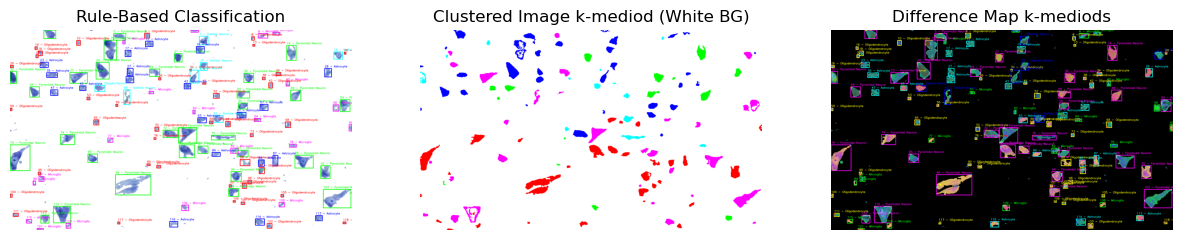

In [73]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images
rule_based_path = r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\final_classified_nissl_cells.png" # Update with actual path
clustered_path =  r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\clustered_nissl_image_kmedoid_5clusters.png" # Update with actual path

rule_based = cv2.imread(rule_based_path)
clustered = cv2.imread(clustered_path)

# Ensure images are loaded
if rule_based is None or clustered is None:
    raise ValueError("One or both images could not be loaded. Check file paths.")

# Resize images to match dimensions
if rule_based.shape[:2] != clustered.shape[:2]:
    clustered = cv2.resize(clustered, (rule_based.shape[1], rule_based.shape[0]))

# Convert black background to white in the clustered image (invert colors)
gray_clustered = cv2.cvtColor(clustered, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(gray_clustered, 10, 255, cv2.THRESH_BINARY)  # Detect foreground
white_bg = np.full_like(clustered, 255)  # Create a white background
clustered_white_bg = np.where(mask[:, :, None] > 0, clustered, white_bg)  # Apply mask

# Compute absolute color difference
diff = cv2.absdiff(rule_based, clustered_white_bg)

# Display images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(rule_based, cv2.COLOR_BGR2RGB))
plt.title("Rule-Based Classification")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(clustered_white_bg, cv2.COLOR_BGR2RGB))
plt.title("Clustered Image k-mediod (White BG)")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(diff, cmap="hot")
plt.title("Difference Map k-mediods")
plt.axis("off")

plt.show()
